In [1]:
import supereeg as se
import pandas as pd
import numpy as np
import os
from scipy import stats
import hypertools as hyp
import plot as plot
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from nilearn import plotting as ni_plt
import matplotlib.colors as colors
import seaborn as sns

In [2]:
fig_dir = '../../paper/figs/source/freq'
ram_data_dir = '../../data/ram'

In [3]:
ram_data_dir = '../../data/ram'
pyfr_data_dir = '../../data/pyfr'

In [4]:
ram_freq_dir = os.path.join(ram_data_dir, 'freq')
pyfr_freq_dir = os.path.join(pyfr_data_dir, 'freq')

In [5]:
RAM_df = pd.read_csv(os.path.join(ram_data_dir, 'ram.csv'), index_col=0)
pyFR_df = pd.read_csv(os.path.join(pyfr_data_dir, 'pyfr.csv'), index_col=0)

In [6]:
r = 20

## For RAM

In [7]:
## load in all frequencies as longform and wideform :

long_form_freq_ram = pd.DataFrame()
wide_form_freq_ram = pd.DataFrame()

freqs = ['delta', 'theta', 'alpha', 'beta', 'lgamma', 'hgamma', 'broadband']
latex_freqs = ["$\delta$", r'$\theta$', r'$\alpha$', r'$\beta$', "$gamma_L$", "$gamma_H$", 'broadband']

for e, freq in enumerate(freqs):
    
    freq_df = pd.read_csv(os.path.join(ram_freq_dir, freq + '.csv'), index_col=0)
    
#     freq_locs_ram = plot.compile_df_locs(freq_df['R'])
#     corr_pyfr_locs_ram = np.atleast_2d(freq_df['across'])
    
    long_form_across = pd.DataFrame()
    long_form_across['Correlation'] = freq_df['across']
    long_form_across['Subject'] = 'a'
    long_form_across['Freq'] = latex_freqs[e]
    
    long_form_within = pd.DataFrame()
    long_form_within['Correlation'] = freq_df['within']
    long_form_within['Subject'] = 'w'
    long_form_within['Freq'] = latex_freqs[e]
    
    wide_form_temp = pd.DataFrame()
    wide_form_temp = freq_df[['across', 'within']]
    wide_form_temp['Freq'] = latex_freqs[e]

    
    long_form_freq_temp = long_form_across.append(long_form_within)
    
    long_form_freq_ram = long_form_freq_ram.append(long_form_freq_temp)
    
    wide_form_freq_ram = wide_form_freq_ram.append(wide_form_temp)
    

/Users/lucyowen/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
## load in all RAM data:
dfs = ['W_a_a', 'W_a_all', 'W_a_w', 'W_w_a', 'W_w_all', 'W_w_w']
long_form = plot.long_form_df(RAM_df, dfs[0])
for df_ in dfs[1:]:
    long_form = long_form.append(plot.long_form_df(RAM_df, df_))
long_form_ram = long_form[long_form['Experiment']=='all']
long_form_ram.rename(columns = {'Experiment':'Freq'}, inplace = True)
long_form_ram.head()
## all RAM data to freq dataframe:
all_df = pd.DataFrame()
all_df['Freq'] = long_form_ram['Freq']
all_df['within'] = long_form_ram[long_form_ram['Subject']=='w']['Correlation']
all_df['across'] = long_form_ram[long_form_ram['Subject']=='a']['Correlation']

long_form_freq_ram = long_form_ram.append(long_form_freq_ram)

wide_form_freq_ram = all_df.append(wide_form_freq_ram)
freqnames = ['all', "$\delta$", r'$\theta$', r'$\alpha$', r'$\beta$', "$gamma_L$", "$gamma_H$", 'broadband']

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


## For PyFR:

In [14]:
## load in all frequencies as longform and wideform :

long_form_freq_pyfr = pd.DataFrame()
wide_form_freq_pyfr = pd.DataFrame()

freqs = ['delta', 'theta', 'alpha', 'beta', 'lgamma', 'hgamma', 'broadband']
latex_freqs = ["$\delta$", r'$\theta$', r'$\alpha$', r'$\beta$', "$gamma_L$", "$gamma_H$", 'broadband']

for e, freq in enumerate(freqs):
    
    freq_df = pd.read_csv(os.path.join(ram_freq_dir, freq + '.csv'), index_col=0)
    
    freq_locs_pyfr = plot.compile_df_locs(freq_df['R'])
    corr_pyfr_locs_pyfr = np.atleast_2d(freq_df['across'])
    
    long_form_across = pd.DataFrame()
    long_form_across['Correlation'] = freq_df['across']
    long_form_across['Subject'] = 'a'
    long_form_across['Freq'] = latex_freqs[e]
    
    long_form_within = pd.DataFrame()
    long_form_within['Correlation'] = freq_df['within']
    long_form_within['Subject'] = 'w'
    long_form_within['Freq'] = latex_freqs[e]
    
    wide_form_temp = pd.DataFrame()
    wide_form_temp = freq_df[['across', 'within']]
    wide_form_temp['Freq'] = latex_freqs[e]

    
    long_form_freq_temp = long_form_across.append(long_form_within)
    
    long_form_freq_pyfr = long_form_freq_pyfr.append(long_form_freq_temp)
    
    wide_form_freq_pyfr = wide_form_freq_pyfr.append(wide_form_temp)
    

/Users/lucyowen/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
## load in all RAM data:
long_form_across = pd.DataFrame()
long_form_across['Correlation'] = pyFR_df['across']
long_form_across['Subject'] = 'a'
long_form_across['Experiment'] = 'all'
long_form_within = pd.DataFrame()
long_form_within['Correlation'] = pyFR_df['within']
long_form_within['Subject'] = 'w'
long_form_within['Experiment'] = 'all'

long_form_pyfr = long_form_across.append(long_form_within)
long_form_pyfr.rename(columns = {'Experiment':'Freq'}, inplace = True)
long_form_freq_pyfr = long_form_pyfr.append(long_form_freq_pyfr)

all_df = pd.DataFrame()
all_df['Freq'] = long_form_pyfr['Freq']
all_df['within'] = long_form_pyfr[long_form_pyfr['Subject']=='w']['Correlation']
all_df['across'] = long_form_pyfr[long_form_pyfr['Subject']=='a']['Correlation']

wide_form_freq_pyfr = all_df.append(wide_form_freq_pyfr)

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


## Make color palette:

In [12]:
## make color palette:
gray = matplotlib.colors.to_rgb('gray')
light_gray = matplotlib.colors.to_rgb('lightgray')
norm = matplotlib.colors.Normalize(vmin=0, vmax=len(freqnames))
rgba = sns.hls_palette(len(freqnames), l=.6, s=.9, h=.2)
rgba_null = sns.hls_palette(len(freqnames), l=.9, s=.4, h=.2)
rgba = sns.color_palette(np.vstack((gray, np.array(rgba))))
rgba_null = sns.color_palette(np.vstack((light_gray, np.array(rgba_null))))

In [11]:
# ## Plot all correlations
# #freqnames = ['delta', 'theta', 'alpha', 'beta', 'lgamma', 'hgamma', 'broadband']
# freqnames = ['delta']
# for freq in freqnames:

#     freq_df = pd.read_csv(os.path.join(ram_freq_dir, freq + '.csv'), index_col=0)


#     corr_freq_df = pd.DataFrame()
#     corr_freq_df['Subject'] = freq_df['Subject']
#     corr_freq_df['within'] = plot.r2z(freq_df['within'])
#     corr_freq_df['across'] = plot.r2z(freq_df['across'])
#     corr_freq_df['R'] = freq_df['R']

    
#     pyfr_locs = plot.compile_df_locs(freq_df['R'])
#     corr_pyfr_locs = np.atleast_2d(freq_df['across'])
    
#     print(freq)
#     print(pyfr_locs.shape)
    
# #     outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
#     outfile = None
    
#     #plot.interp_corr(pyfr_locs, np.atleast_2d(corr_pyfr_locs), width=2, vox_size=2, outfile=outfile)

In [12]:
# Plot all interp correlations

# freqnames = ['delta', 'theta', 'alpha', 'beta', 'lgamma', 'hgamma', 'broadband']
# for freq in freqnames:
#     freq_df = pd.read_csv(os.path.join(freq_dir, freq + '.csv'), index_col=0)
#     grouped_freq_mean = freq_df.groupby('Subject')['across','within'].mean()
#     corr_by_subject = np.array([])
#     R_locs = []
#     subj_by_subject = np.array([])
#     for i, s in enumerate(grouped_freq_mean.index):


#         sub_locs = plot.compile_df_locs(freq_df['R'][freq_df['Subject'] == s])

#         if R_locs == []:
#             R_locs = sub_locs 
#         else:

#             R_locs = np.vstack((R_locs, sub_locs))

#         sub_corr = np.atleast_2d(grouped_freq_mean['across'][i])

#         corr_by_subject = np.append(corr_by_subject, np.array([grouped_freq_mean['across'][i]]* np.shape(sub_locs)[0]))

#         subj_by_subject = np.append(subj_by_subject, np.array([str(s)]* np.shape(sub_locs)[0]))



#     bestloc_pyfr_df = pd.DataFrame()
#     bestloc_pyfr_df['Correlation'] = plot.z2r(corr_by_subject)
#     bestloc_pyfr_df['Subject'] = subj_by_subject
#     bestloc_pyfr_df['R'] = None

#     R_locs_str = []
#     for i in range(bestloc_pyfr_df.shape[0]):
#         R = str(R_locs[i])
#         if R_locs_str == []:
#             R_locs_str = R
#         else:

#             R_locs_str = np.vstack((R_locs_str, R))

#     bestloc_pyfr_df['R'] = R_locs_str
    
#     most_info_pyfr = plot.most_informative_locs(bestloc_pyfr_df, vox_size=4, width=r)
#     #best_locs_mask = pd.DataFrame()
#     #best_locs_mask['PyFR'] = most_info_pyfr
#     #pyfr_best = best_locs_mask['PyFR']> np.percentile(best_locs_mask['PyFR'].values, 90)
#     sub_nii = se.load('std', vox_size=4)
#     sub_locs = sub_nii.get_locs().values
#     bo_nii = se.Brain(data=np.atleast_2d(most_info_pyfr), locs=sub_locs)
#     nii_bo = se.helpers._brain_to_nifti(bo_nii, sub_nii)
#     ni_plt.plot_glass_brain(nii_bo, colorbar=True, threshold=None, vmax=1, vmin=0, display_mode='lyrz')
#     ni_plt.show()

In [10]:
# # split violin plots:

# plot.plot_split_violin_colors(df=long_form_freq, X='Freq', Y='Correlation', H='Subject', 
#                          x_order=freqnames, hue_order=['a', 'w'], left_colors=rgba, right_colors=rgba_null)

/Users/lucyowen/repos/supereeg_paper/code/notebooks/plot.py:801: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_temp['Correlation'] = df_temp['Correlation'] - offset
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


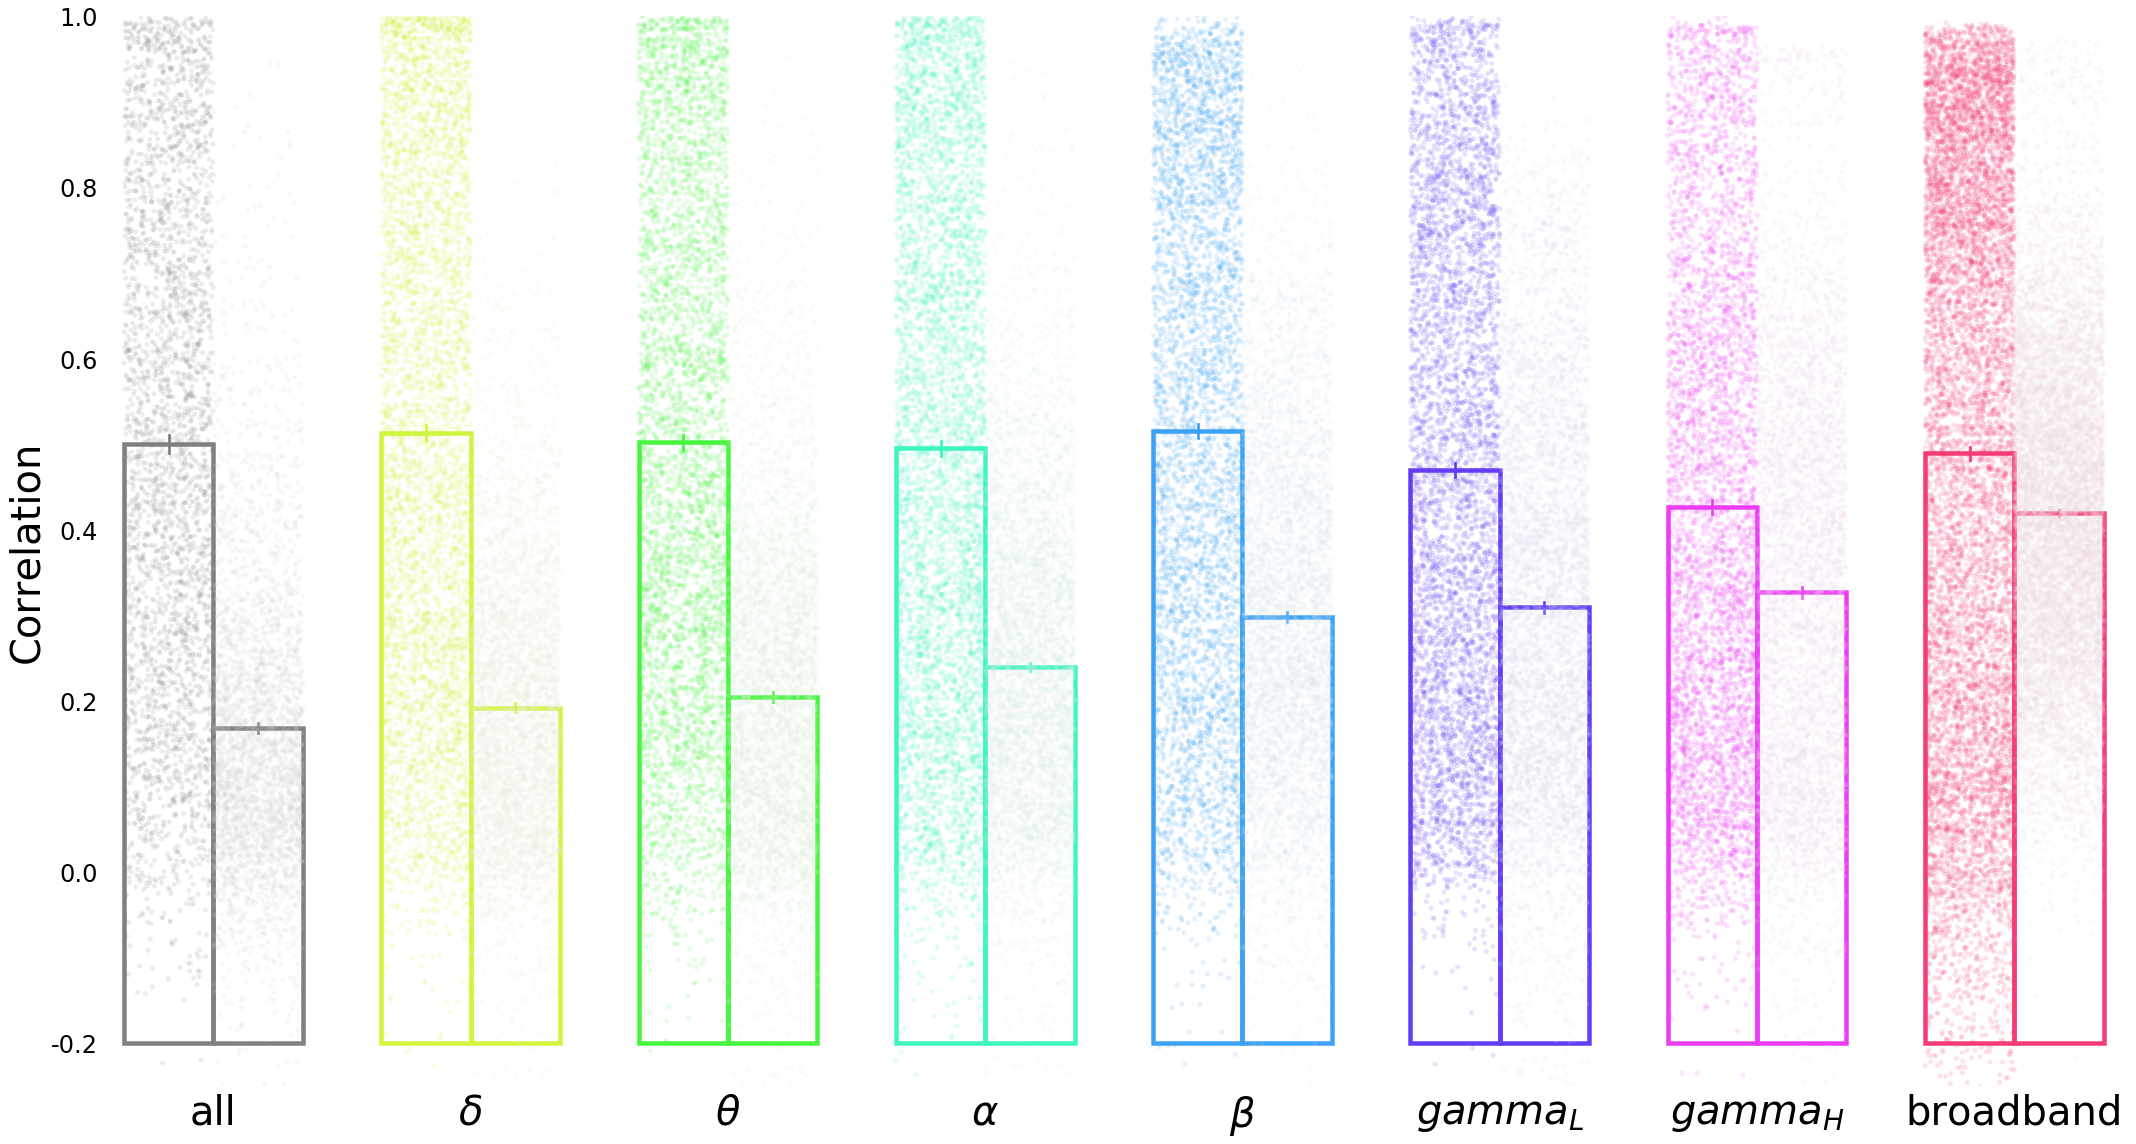

In [13]:

plot.plot_split_barplot_colors(df=long_form_freq_ram, X='Freq', Y='Correlation', H='Subject', 
                        x_order=freqnames, hue_order=['a', 'w'], left_colors=rgba, right_colors=rgba_null)

In [15]:
def largest_indices(ary, n):
    """Returns the n largest indices from a numpy array."""
    flat = ary.flatten()
    indices = np.argpartition(flat, -n)[-n:]
    indices = indices[np.argsort(-flat[indices])]
    return np.unravel_index(indices, ary.shape)

In [16]:
def smallest_indices(ary, n):
    """Returns the n largest indices from a numpy array."""
    flat = ary.flatten()
    indices = np.argpartition(flat, n)[:n]
    indices = indices[np.argsort(flat[indices])]
    return np.unravel_index(indices, ary.shape)

In [17]:
def rbf(centers, widths, locs):
    """
    Radial basis function
    Parameters
    ----------
    centers : ndarray
        rbf coordinates (one row per RBF)
    widths : ndarray
        RBF radii
    locs : ndarray
        locations to evaluate the RBFs (one row per location)
        
    Returns
    ----------
    results : ndarray
        Matrix of RBF weights for each RBF (row), at each location (column)
    """    
    weights = np.exp(np.divide(-cdist(locs, centers, metric='euclidean') ** 2, np.tile(np.array(widths, ndmin=2), [locs.shape[0], 1])))
    return weights.T

In [18]:
template = se.helpers._gray(res=2)

In [19]:

# for l in np.arange(0, 15, 1):
#     for c in conditions:
#         conds = glob.glob(os.path.join(data_dir, f'level_{l}', f'{c}.npy'))
#         g_m = np.load(conds[0])

#         networks = copy.copy(g_m)
#         np.fill_diagonal(networks, 0)
#         net_inds = largest_indices(np.triu(np.abs(networks)), top_n)
#         net_inds = np.concatenate((net_inds[0], net_inds[1]))
#         temp_locs = centers[net_inds]
#         temp_widths = widths[net_inds]
        
#         w = rbf(temp_locs, temp_widths, template.get_locs().values)
#         b = se.Brain(data=np.array(np.sum(w, axis=0), ndmin=2), locs=template.get_locs(), minimum_voxel_size=2)
#         nii = se.Nifti(b)
#         outfile = c+ '_' + str(l+1)
#         nii.save(os.path.join(nii_dir, outfile + '_largest_abs'))
#         ni_plt.plot_glass_brain(nii, display_mode='lyrz', output_file=os.path.join(n_f_dir, outfile + '_largest_abs.png'))

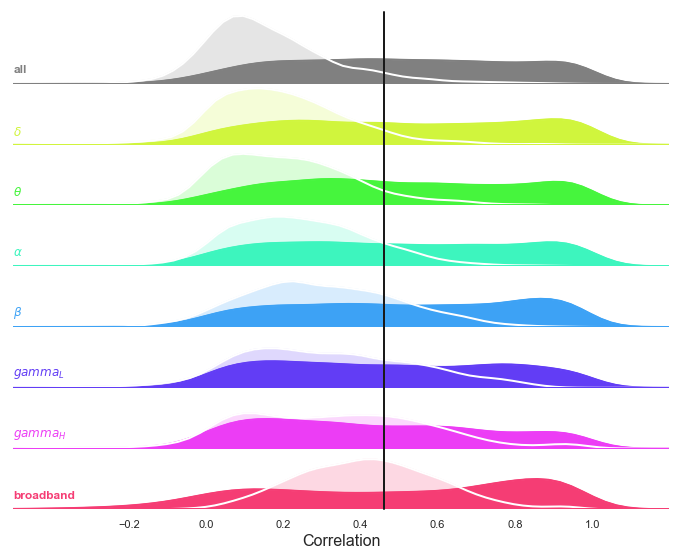

In [20]:
plot.plot_ridges(wide_form_freq, 'Correlation', 'Freq','across', 'within', palette=rgba)